In [1]:
from evaluation import Eval
import pandas as pd
import matplotlib.pyplot as plt
import ptitprince as pt
import seaborn as sns

In [2]:
graphdata_df = pd.read_csv('panacea_graphdata_results.csv')
graphdata_df

,Graph ID,Study ID,Random,Biocontext,Methods,Pagerank Threshold,Number of nodes,Number of edges,Connected targets,Perc missing targets,...,Mean degree centrality,Closeness centrality,Mean closeness centrality,Betweenness centrality,Mean betweenness centrality,offtarget_count,all_offtargets,perc_offtarget,perc_offtarget_nodes,perc_offtarget_edges
0,PANACEA__12819d__H1793_PONATINIB__reachability...,PANACEA,12819d,H1793_PONATINIB,"reachability, pagerank, reachability, allpaths",3.0,96,289,23,8.0,...,0.063377,"{'MAP4K1': 0.0, 'MAPK1': 0.1994335614821808, '...",0.171747,"{'MAP4K1': 0.0, 'MAPK1': 0.08696953159746851, ...",0.018323,8.0,31.0,25.806452,8.333333,2.768166
1,PANACEA__12819d__H1793_PONATINIB__reachability...,PANACEA,12819d,H1793_PONATINIB,"reachability, pagerank, shortest",10.0,62,77,25,0.0,...,0.040719,"{'MAP4K1': 0.0, 'MAPK1': 0.01639344262295082, ...",0.030963,"{'MAP4K1': 0.0, 'MAPK1': 0.012164541590771101,...",0.001274,4.0,31.0,12.903226,6.451613,5.194805
2,PANACEA__12819d__H1793_PONATINIB__reachability...,PANACEA,12819d,H1793_PONATINIB,"reachability, shortest",100.0,58,68,25,0.0,...,0.041137,"{'MAP4K1': 0.0, 'MAPK1': 0.017543859649122806,...",0.030754,"{'MAP4K1': 0.0, 'MAPK1': 0.013669590643274852,...",0.001264,3.0,31.0,9.677419,5.172414,4.411765
3,PANACEA__12819d__H1793_PONATINIB__reachability...,PANACEA,12819d,H1793_PONATINIB,"reachability, pagerank, shortest, sc",10.0,33,39,11,56.0,...,0.073864,"{'MAP4K1': 0.0, 'MAPK1': 0.03125, 'ETV3': 0.04...",0.053653,"{'MAP4K1': 0.0, 'MAPK1': 0.024361559139784942,...",0.004002,4.0,31.0,12.903226,12.121212,10.256410
4,PANACEA__12819d__H1793_PONATINIB__reachability...,PANACEA,12819d,H1793_PONATINIB,"reachability, shortest, sc",100.0,30,32,11,56.0,...,0.073563,"{'MAP4K1': 0.0, 'MAPK1': 0.034482758620689655,...",0.051814,"{'MAP4K1': 0.0, 'MAPK1': 0.02770935960591133, ...",0.003982,3.0,31.0,9.677419,10.000000,9.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197767,PANACEA__7bbde8__H1793_NILOTINIB__reachability...,PANACEA,7bbde8,H1793_NILOTINIB,"reachability, shortest, sc",100.0,32,42,15,40.0,...,0.084677,"{'MAPK14': 0.0, 'MAPK3': 0.03225806451612903, ...",0.053361,"{'MAPK14': 0.0, 'MAPK3': 0.001075268817204301,...",0.001579,0.0,7.0,0.000000,0.000000,0.000000
197768,PANACEA__7bbde8__H1793_NILOTINIB__reachability...,PANACEA,7bbde8,H1793_NILOTINIB,"reachability, pagerank, shortest",5.0,52,70,25,0.0,...,0.052790,"{'MAPK14': 0.0, 'EGFR': 0.0196078431372549, 'J...",0.033615,"{'MAPK14': 0.0, 'EGFR': 0.001176470588235294, ...",0.000649,0.0,7.0,0.000000,0.000000,0.000000
197769,PANACEA__7bbde8__H1793_NILOTINIB__reachability...,PANACEA,7bbde8,H1793_NILOTINIB,"reachability, shortest",100.0,57,82,25,0.0,...,0.051378,"{'MAPK14': 0.0, 'EGFR': 0.017857142857142856, ...",0.033057,"{'MAPK14': 0.0, 'EGFR': 0.000974025974025974, ...",0.000592,0.0,7.0,0.000000,0.000000,0.000000
197770,PANACEA__7bbde8__H1793_NILOTINIB__reachability...,PANACEA,7bbde8,H1793_NILOTINIB,"reachability, pagerank, reachability, allpaths",3.0,65,208,23,8.0,...,0.100000,"{'MAPK14': 0.0, 'PRKACA': 0.1985294117647059, ...",0.180997,"{'MAPK14': 0.0, 'PRKACA': 0.09696167685378994,...",0.020085,0.0,7.0,0.000000,0.000000,0.000000


In [3]:

# change the Random column so that it contains False when Random==real and True otherwise
graphdata_df['Random'] = graphdata_df['Random'].apply(lambda x: False if x=='real' else True)





In [7]:

def plot_raincloud_plots(graphdata_df, feature):
    # define 3x2 facetgrid, not 6x1

    g = sns.FacetGrid(graphdata_df, col = "Methods", height = 4, aspect = 16/9, col_wrap=3)
    g = g.map_dataframe(pt.RainCloud, x = "Random", y = feature, data = graphdata_df,
                    orient = "h")
    # add plot title
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(feature)
    return g


In [8]:
graphdata_df.columns
variables_to_plot = ['Number of nodes', 'Number of edges', 'Perc missing targets',
       'Mean degree centrality',
       'Mean closeness centrality',
       'Mean betweenness centrality', 'offtarget_count', 'all_offtargets',
       'perc_offtarget', 'perc_offtarget_nodes', 'perc_offtarget_edges']

Number of nodes
Number of edges
Perc missing targets
Mean degree centrality
Mean closeness centrality
Mean betweenness centrality
offtarget_count
all_offtargets
perc_offtarget
perc_offtarget_nodes
perc_offtarget_edges


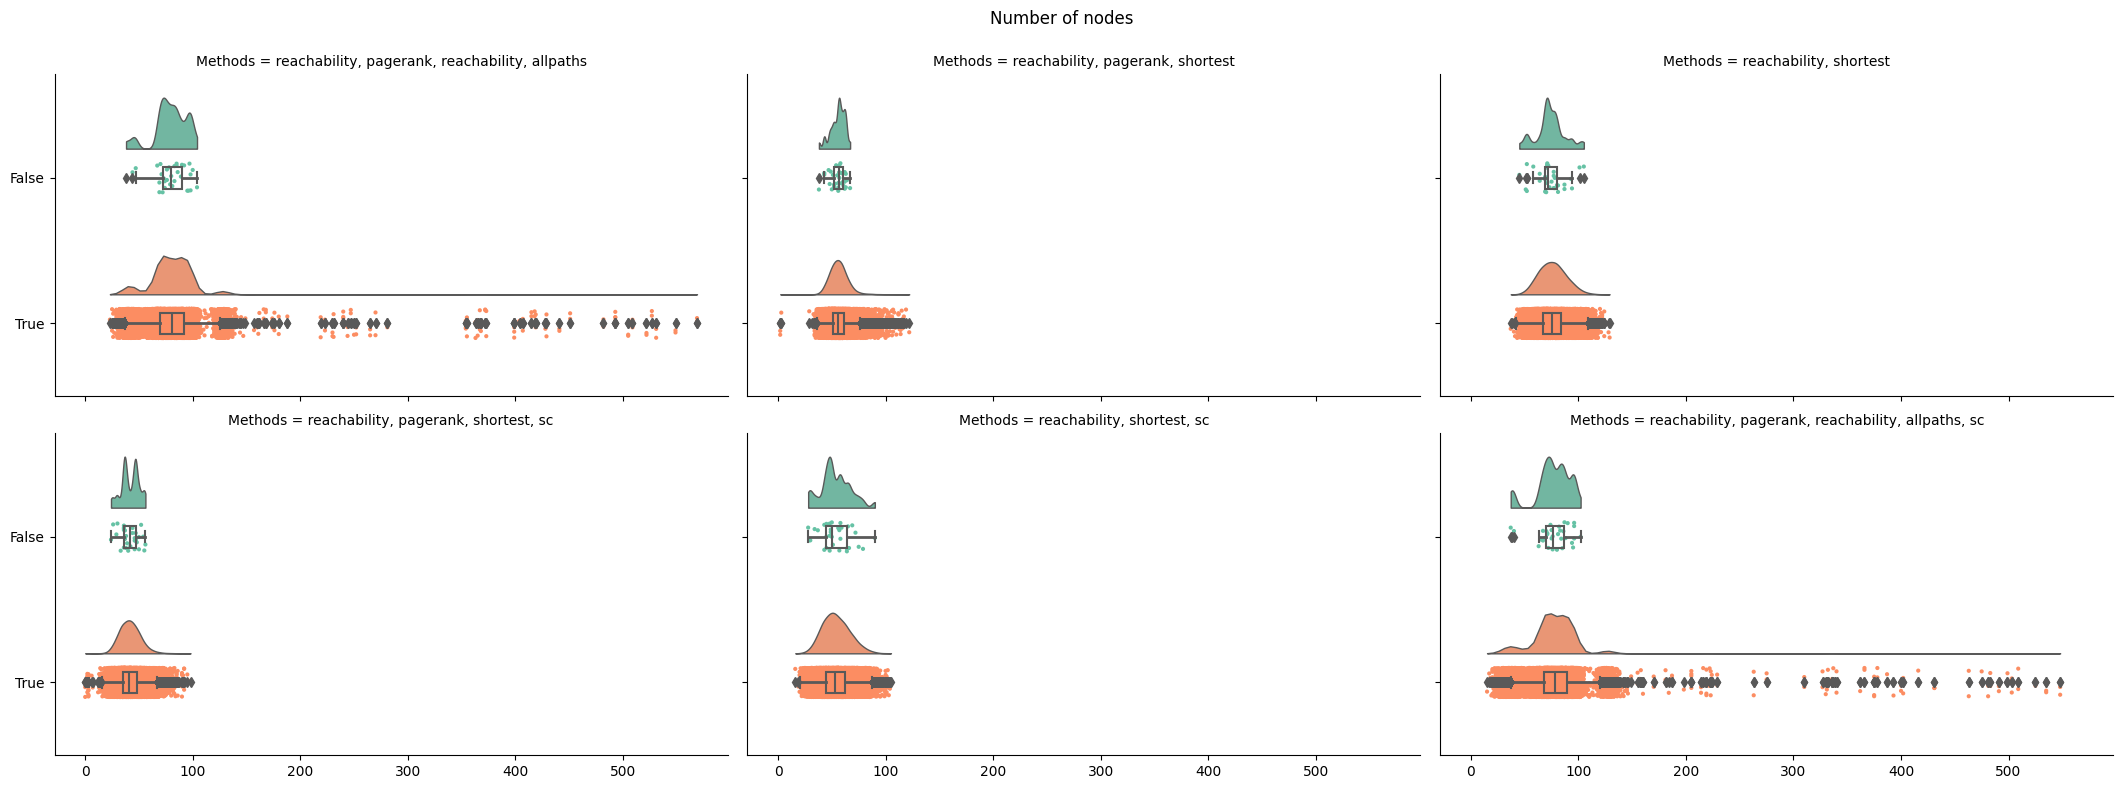

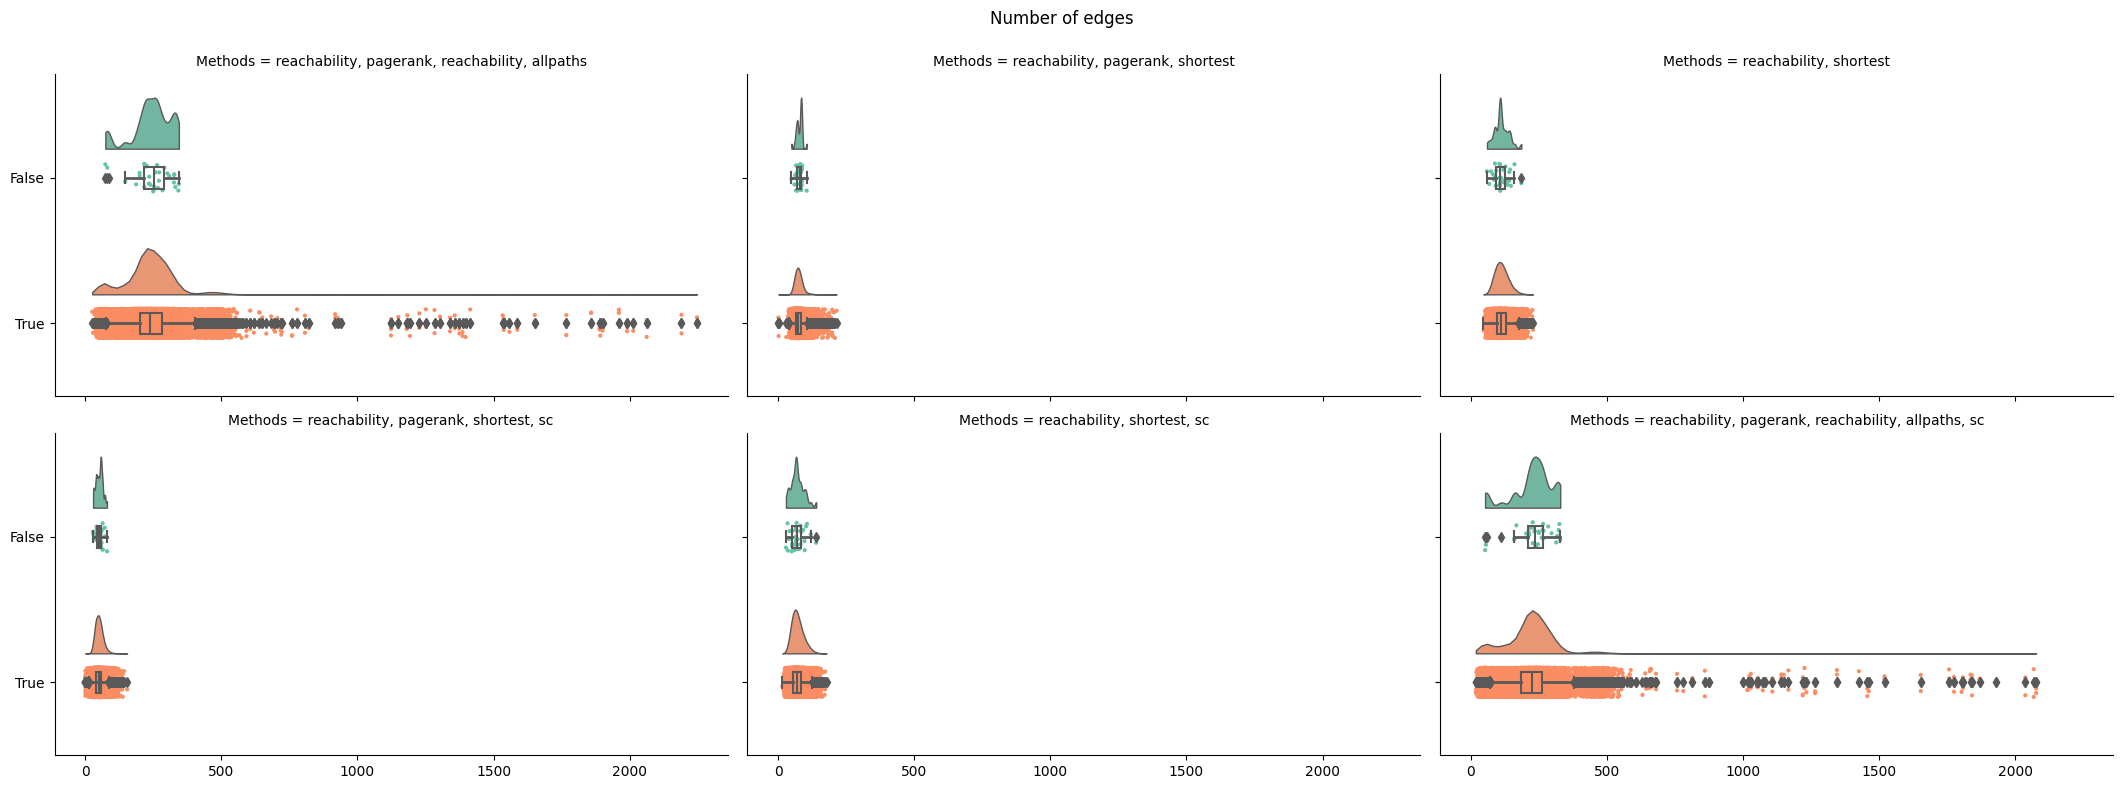

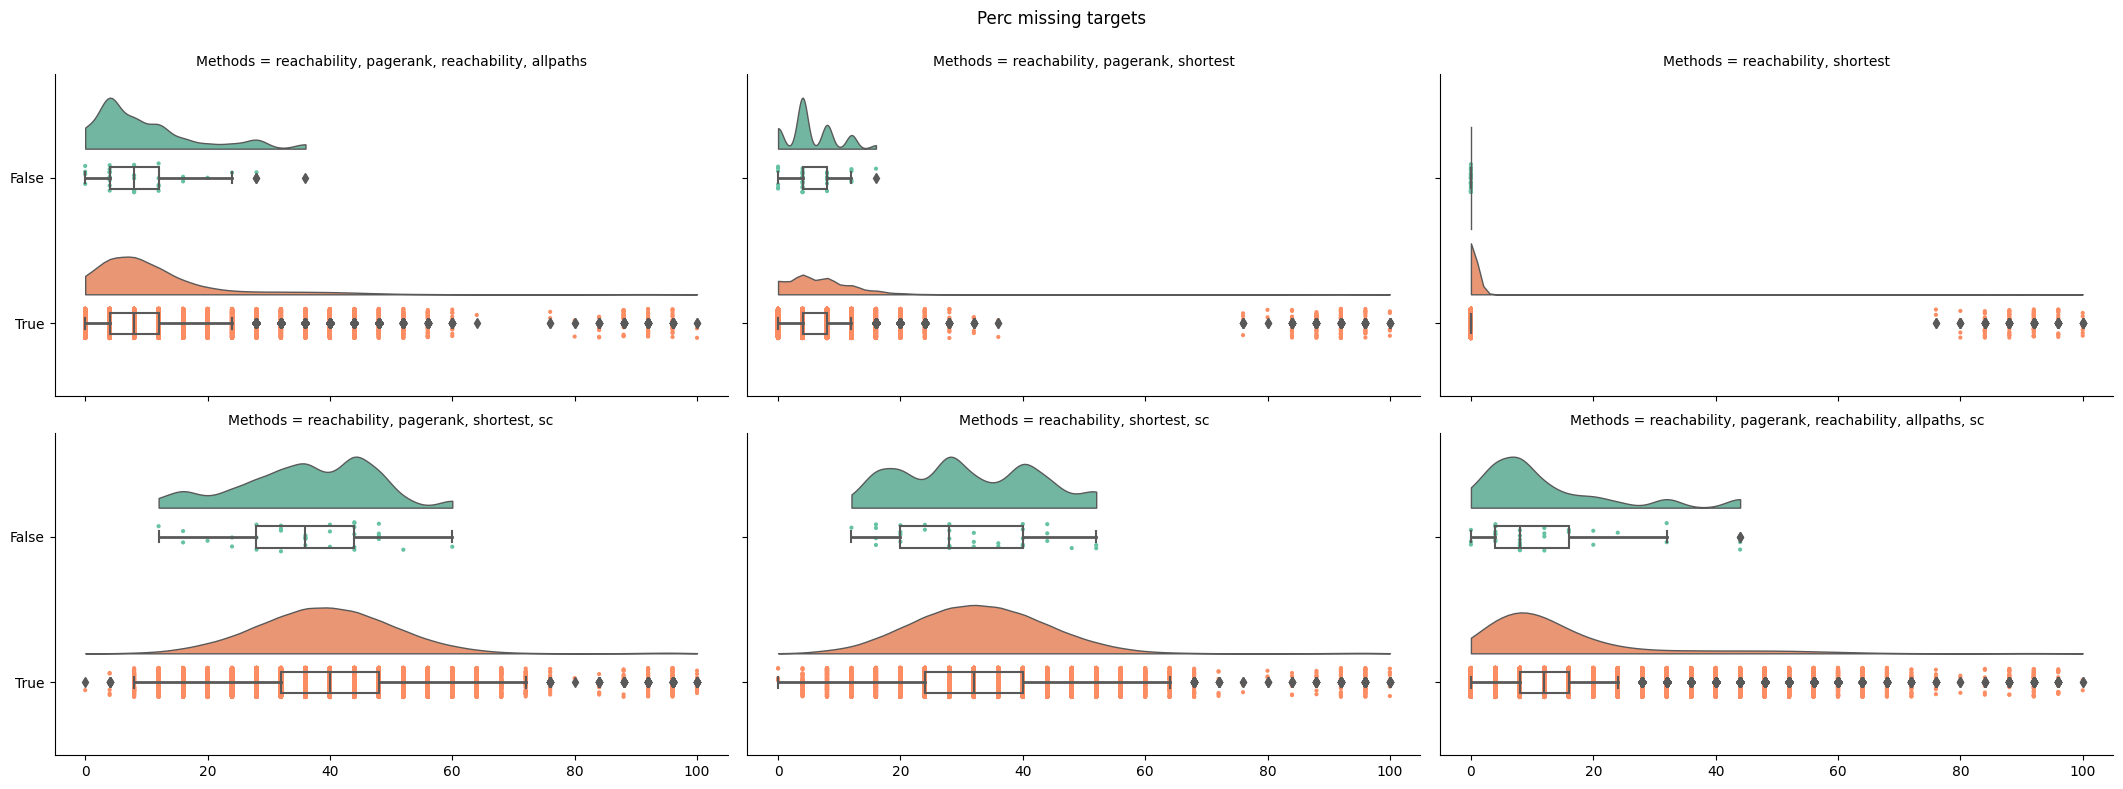

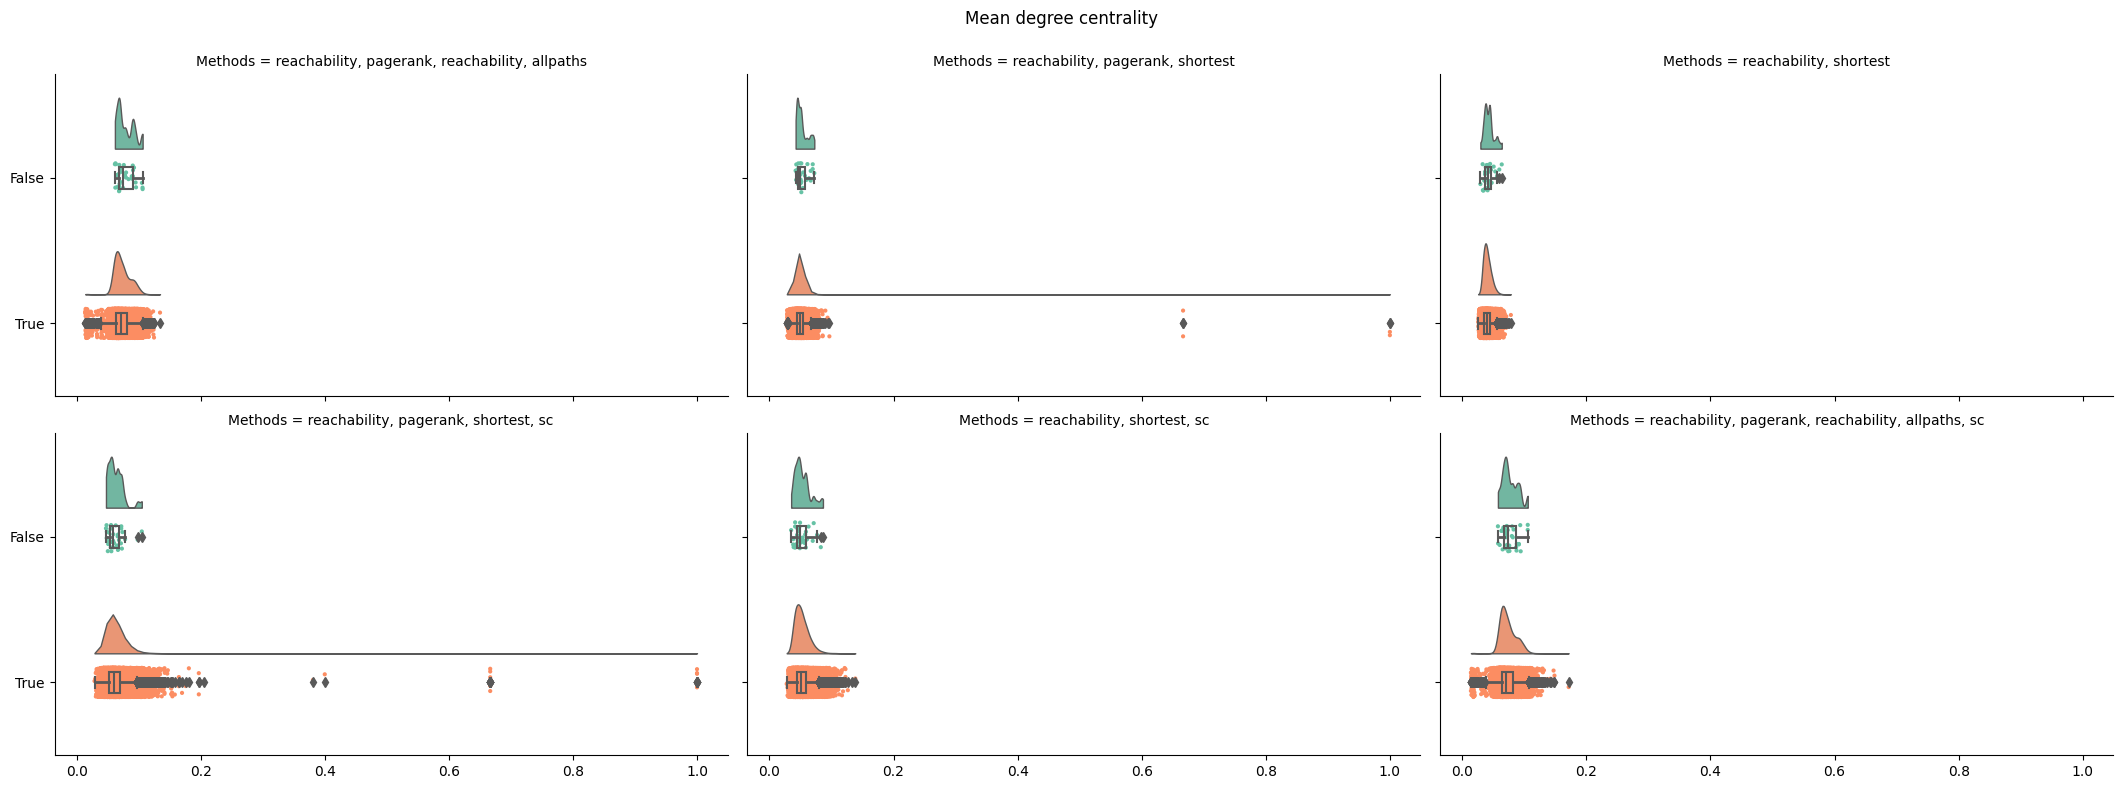

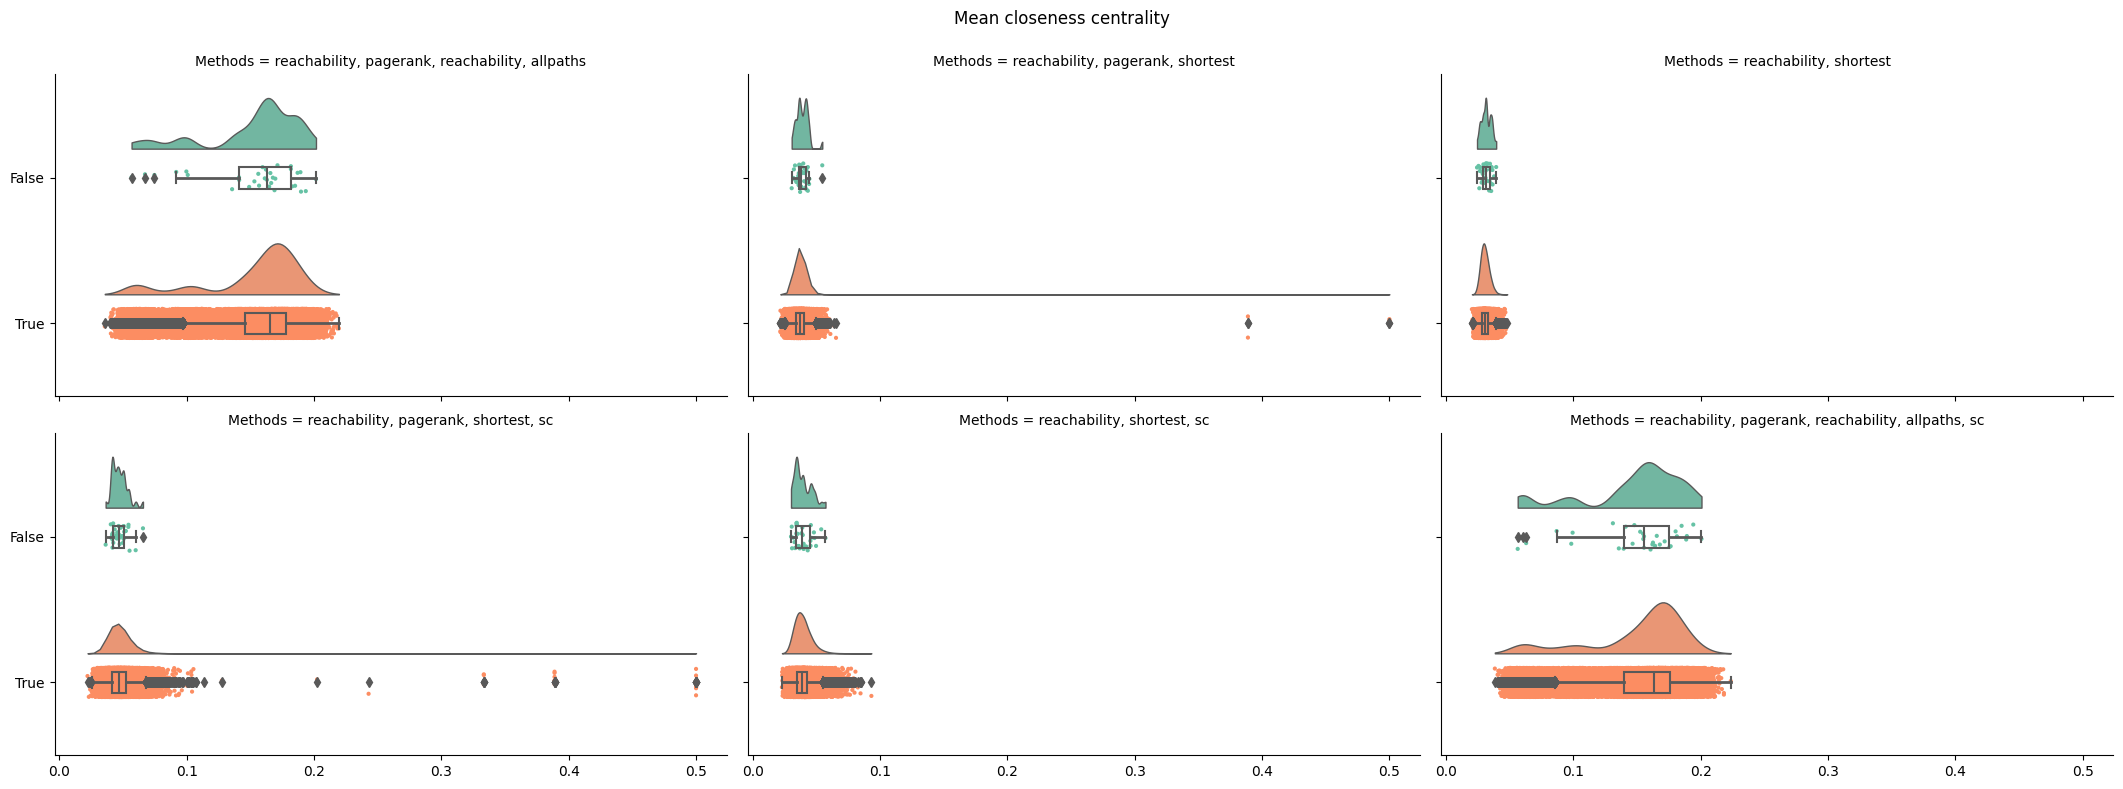

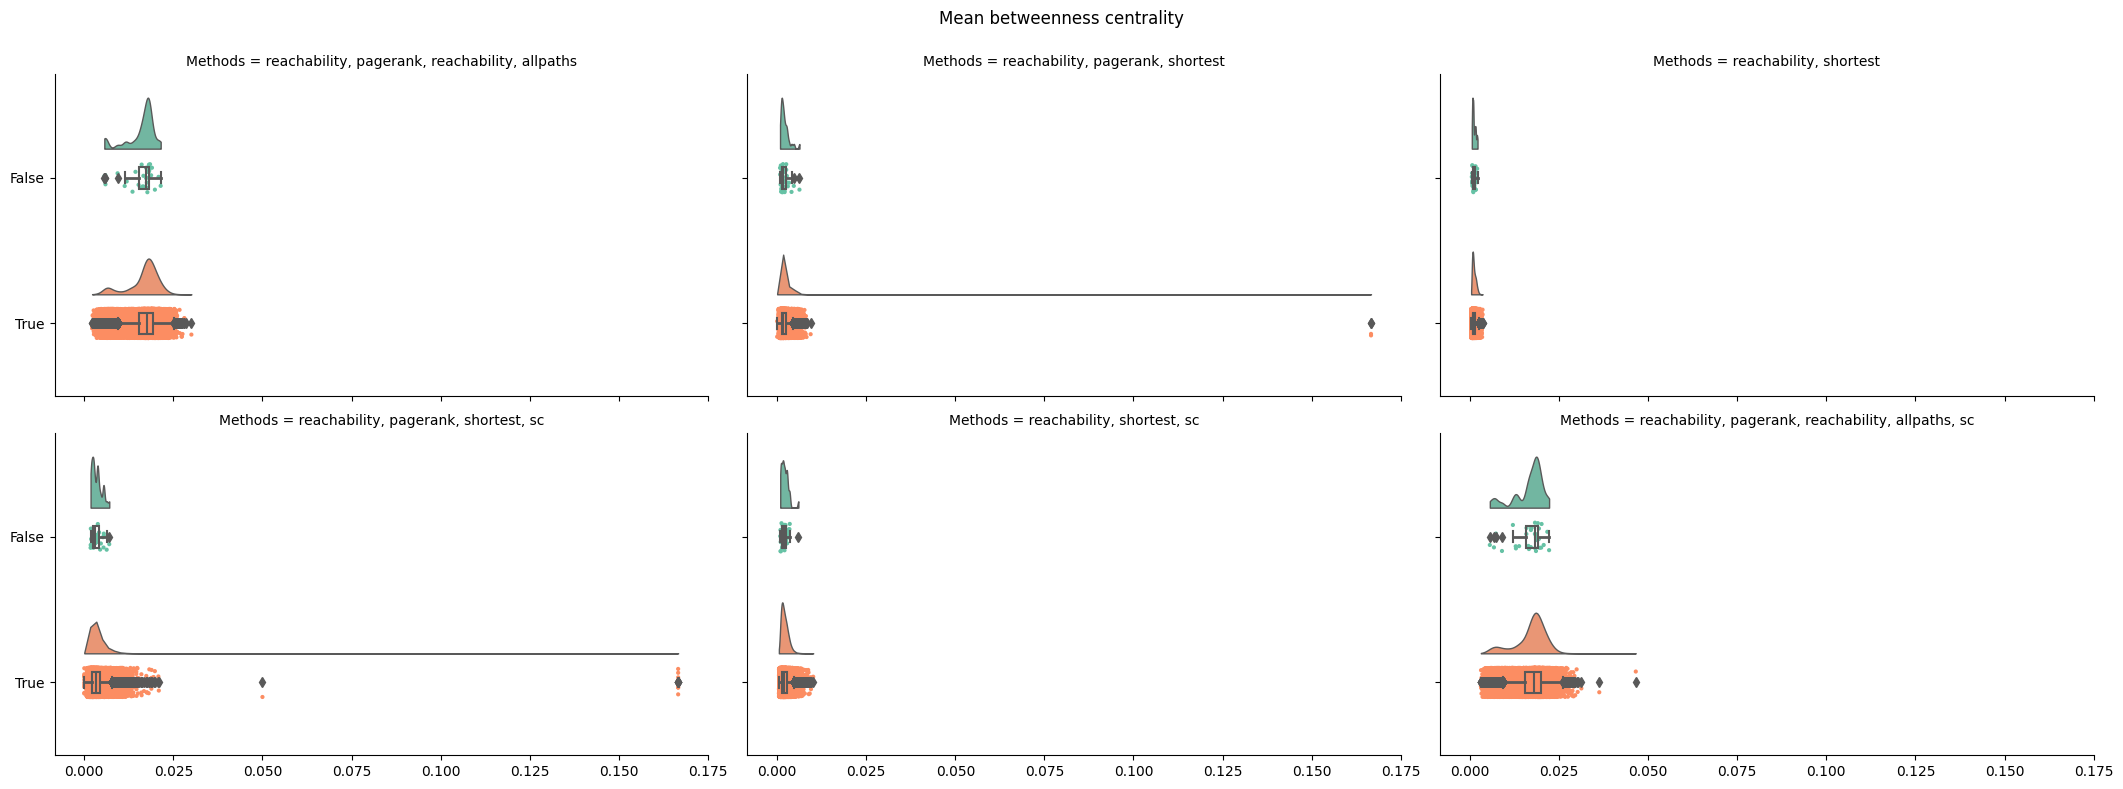

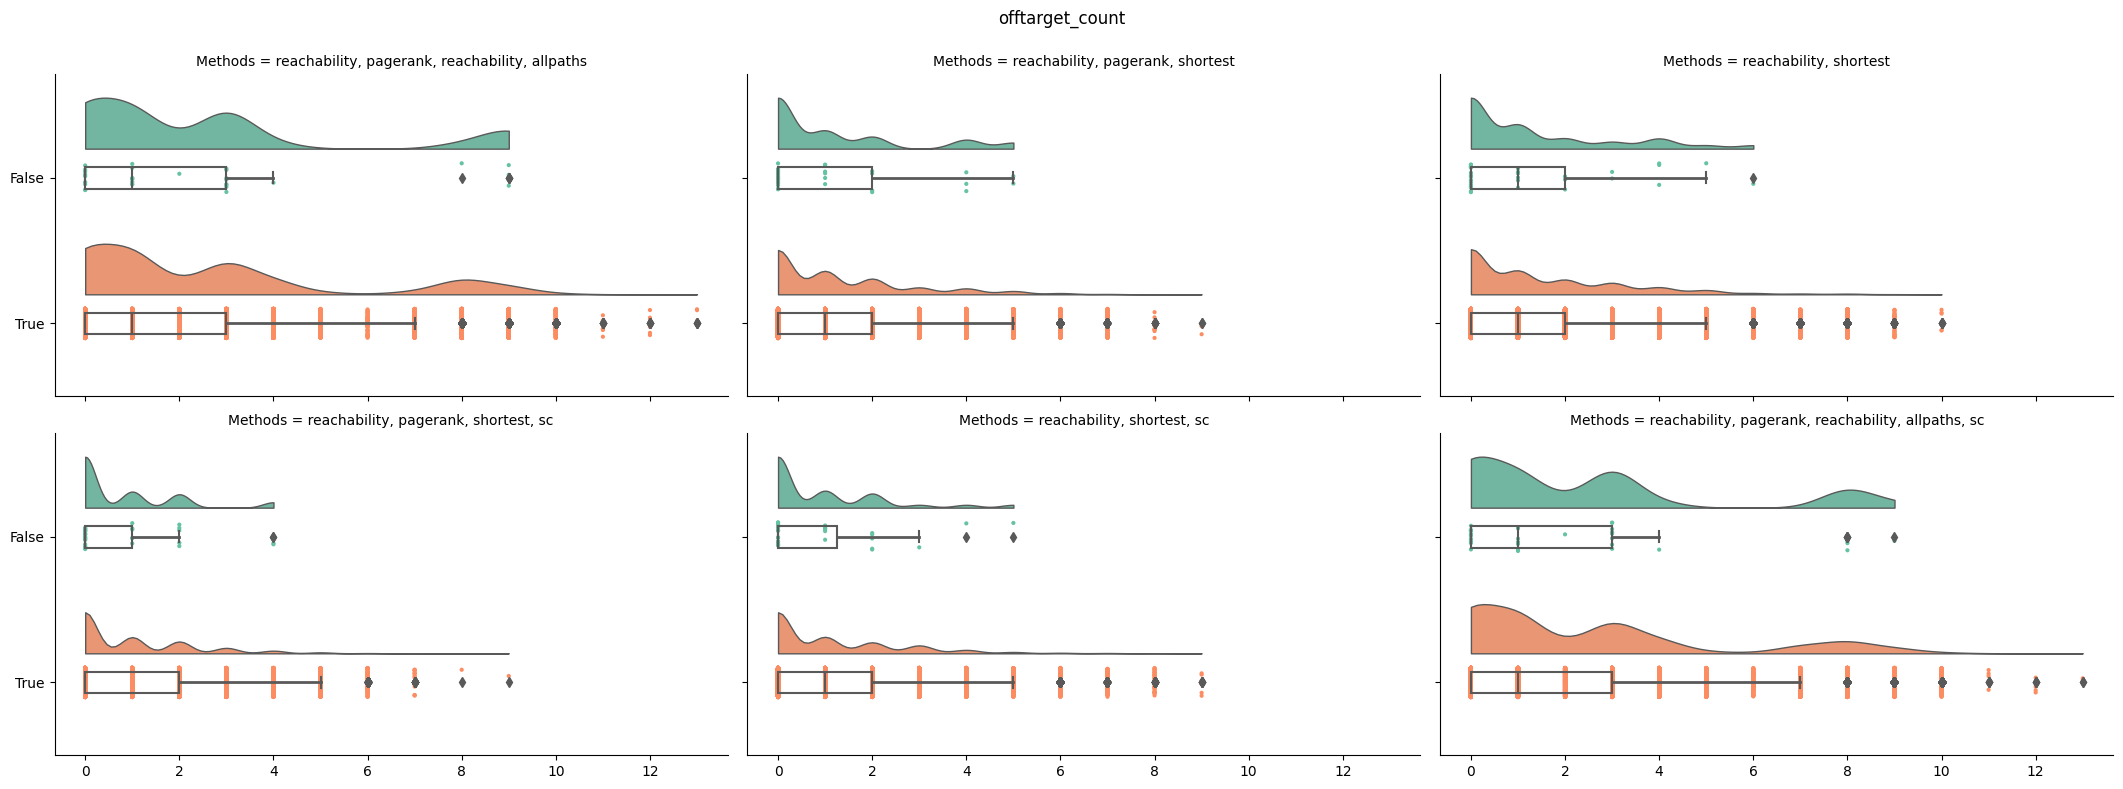

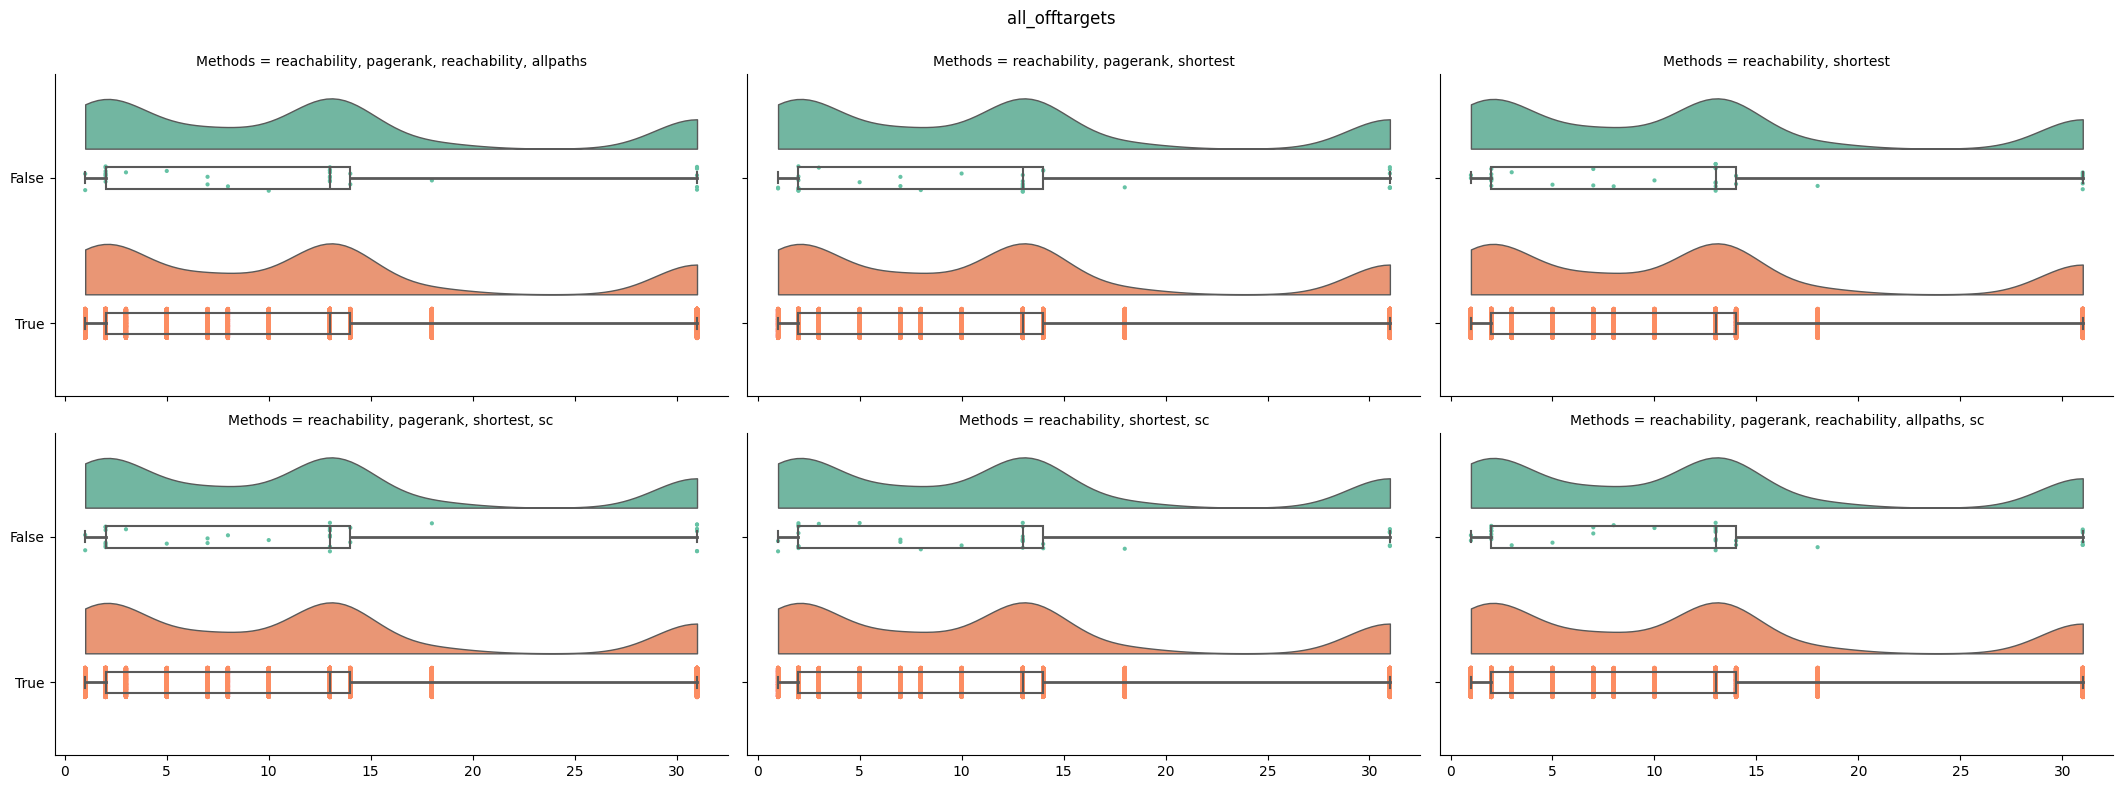

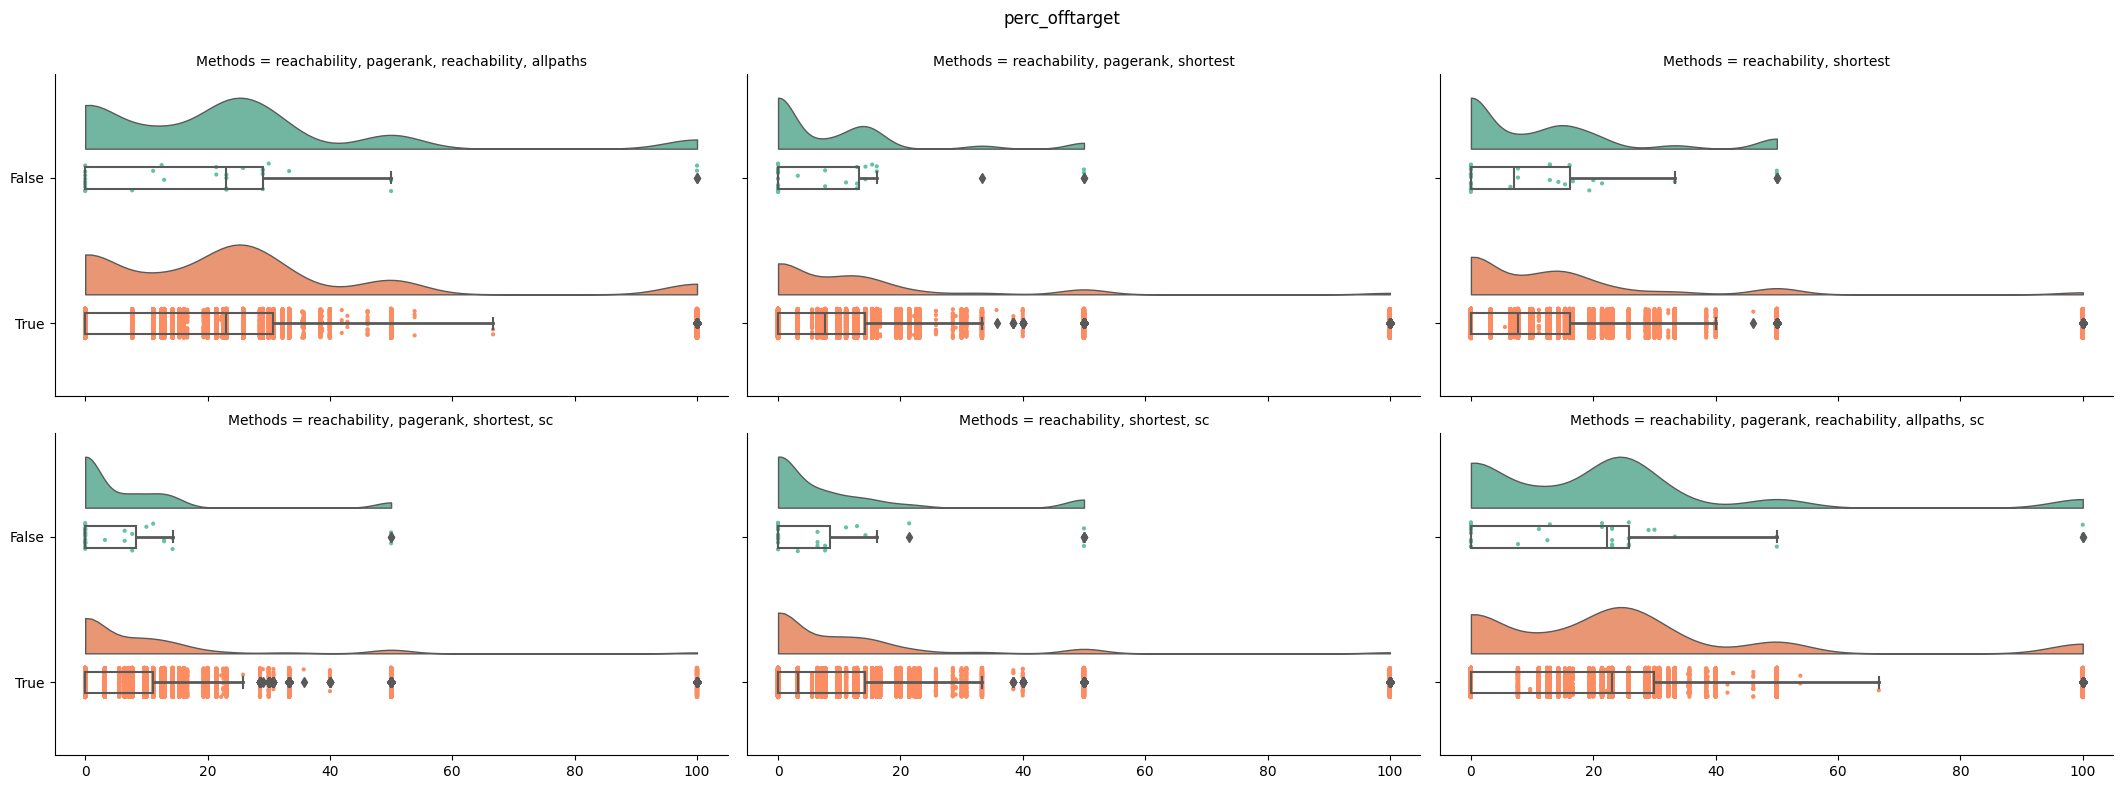

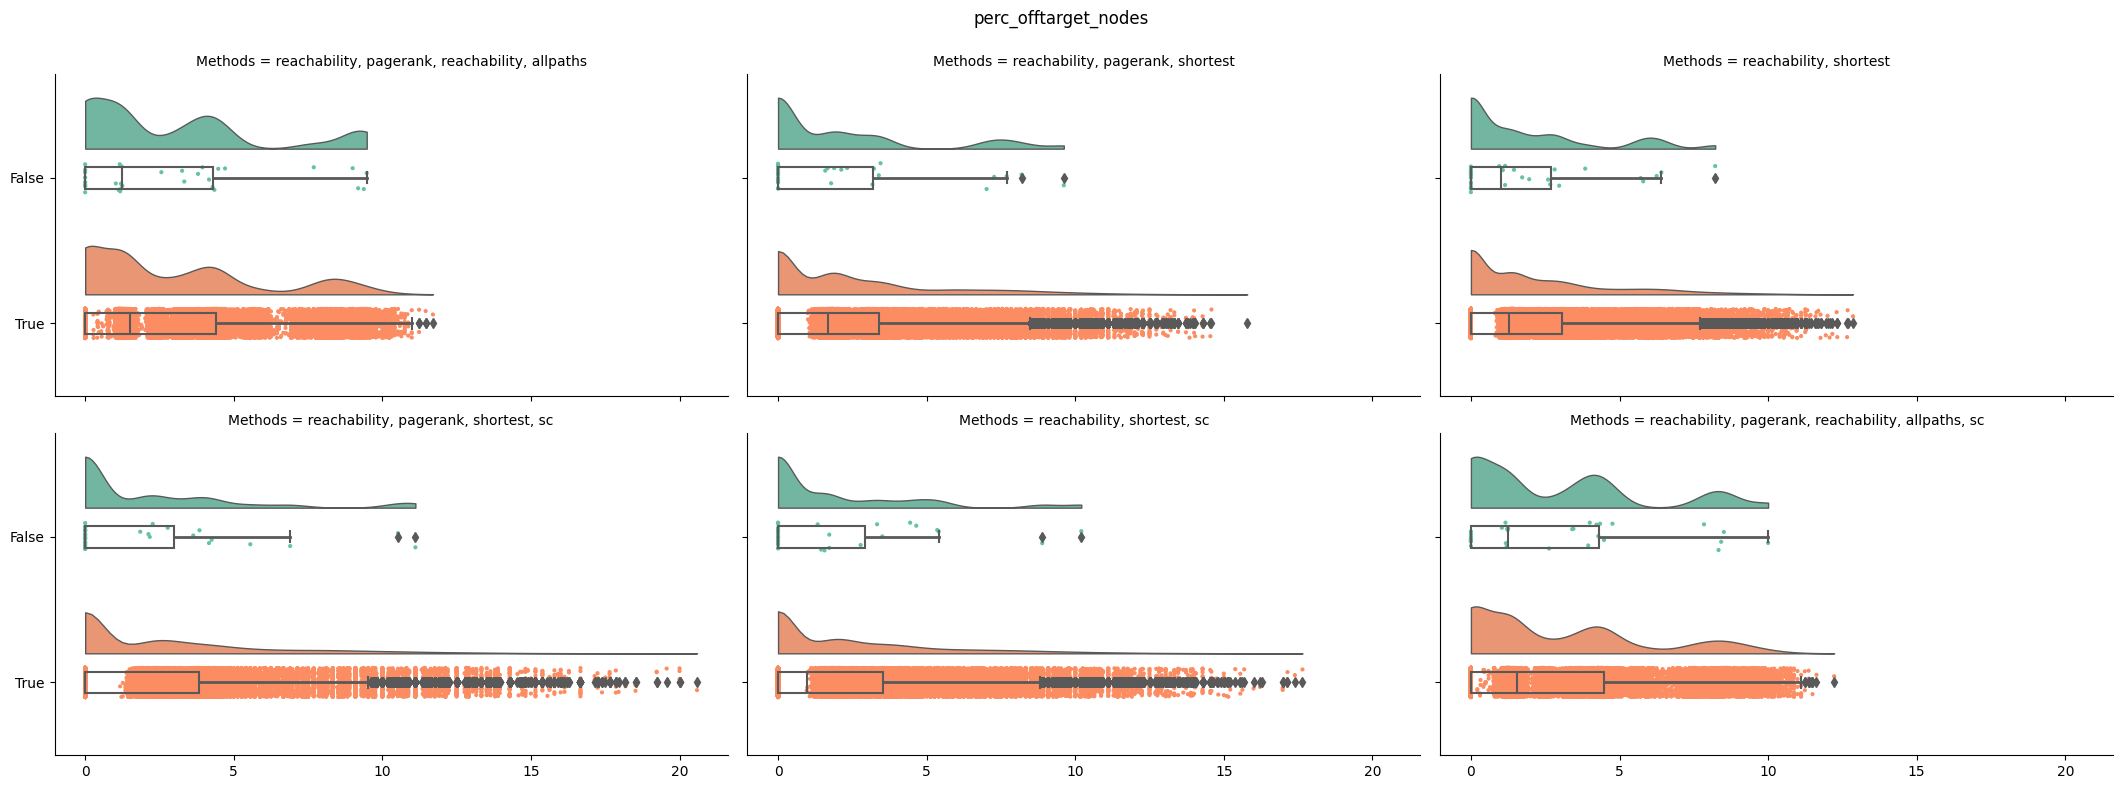

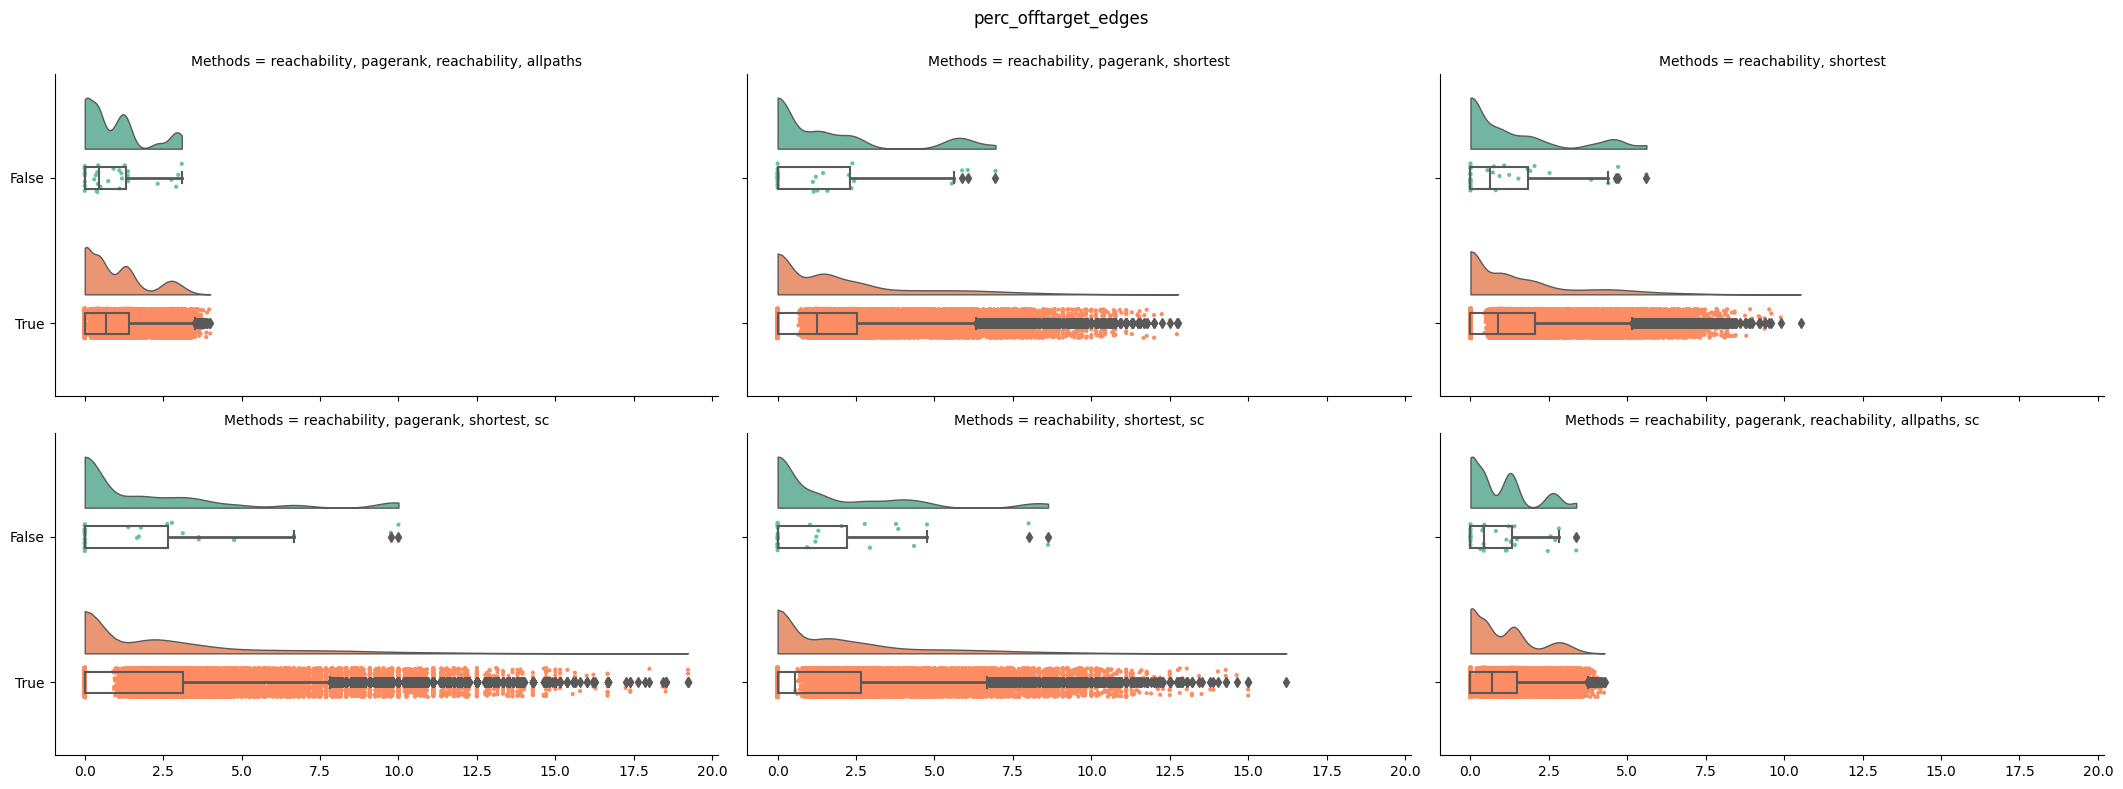

In [9]:
for feature in variables_to_plot:
    print(feature)
    plot_raincloud_plots(graphdata_df, feature)